---

<h3> <center><b>Вариант 14 |</b> <i>Свирин Максим Сергеевич</i> <b>| Б19-501</b></center> </h3>

$$
\begin{cases}
\dot{x}=-x+y^2\\
\dot{y}=x^2-y^3
\end{cases}
$$

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact

In [2]:
def F(v, t):
    dxdt = -v[0]    + v[1]**2
    dydt =  v[0]**2 - v[1]**3
    return [dxdt, dydt]

def der_x(x, y):
    return -x + y*y

def der_y(x, y):
    return x*x - y**3

N = 101
t = np.linspace(0, 10, num=N)

In [3]:
def sol_eq(F, s0, s1, t):
    return odeint(F, [s0, s1], t)

In [4]:
def interact_sol(s0=0.05, s1=0.05, T=10, N=101):
    plt.clf()
    t = np.linspace(0, T, num=N)
    
    v = sol_eq(F, s0, s1, t)
    x, y = v[:, 0], v[:, 1]

    plt.plot(x, y, label="y=f(x)")
    plt.legend()
    plt.gray()
    plt.xlabel("x")
    plt.ylabel("y")

interact(interact_sol, s0=(-1, 1, 0.01), s1=(-1, 1, 0.01), T=(10, 1000, 10), N=(101, 10001, 100))

interactive(children=(FloatSlider(value=0.05, description='s0', max=1.0, min=-1.0, step=0.01), FloatSlider(val…

<function __main__.interact_sol(s0=0.05, s1=0.05, T=10, N=101)>

---

Точки покоя системы 
$$
\begin{cases}
\dot{x}=f(x, y)\\
\dot{y}=g(x, y)
\end{cases}
$$
ищутся из условия:
$$
\begin{cases}
f(x, y)=0\\
g(x, y)=0
\end{cases}
$$

Для данного случая:
$$
\begin{cases}
f(x, y)=-x+y^2=0\\
g(x, y)=x^2-y^3=0
\end{cases}
$$
Из первого имеем:
$$
x=y^2
$$
Подставив во второе:
$$
y^4-y^3=0 \Rightarrow y^3(y-1)=0$$
$$\Rightarrow
\begin{cases}
y_1=0\\
y_2=1
\end{cases}
\Rightarrow
\begin{cases}
x_1=0\\
x_2=1
\end{cases}
$$

Точки $(0, 0)$ и $(1, 1)$ - точки покоя системы

---

Исследуем полученные точки покоя системы на устойчивость

1. $(0, 0)$<br/>
$$
A=
\begin{pmatrix}
\frac{\partial f(x, y)}{\partial x} & \frac{\partial f(x, y)}{\partial y}\\
\frac{\partial g(x, y)}{\partial x} & \frac{\partial g(x, y)}{\partial y}
\end{pmatrix}\Bigg|_{x=0,y=0}
=
\left[
  \begin{array}{ccc}
     f(x,y) &=& -x+y^2\\
     g(x,y) &=& x^2-y^3 \\
  \end{array}
\right]
=
\begin{pmatrix}
-1 & 2y\\
2x & -3y^2
\end{pmatrix}\Bigg|_{x=0,y=0}
=
\begin{pmatrix}
-1 & 0\\
 0 & 0
\end{pmatrix}
$$

Найдём корни характеристического многочлена для матрицы $A$:

$$
\begin{vmatrix}
-1-\lambda & 0\\
 0 & -\lambda
\end{vmatrix}
\; = \;
\lambda(\lambda+1) \; = \;0
\Rightarrow\\
\Rightarrow
  \lambda_{1}=0, \; \lambda_{2}=-1
$$

Видим, что оба значения лямбда действительные, одно из них равно $0$, а другое отрицательное. 
Значит, <b>точка $(0,0)$ является устойчивой</b>, задаёт <b>устойчивую прямую</b>.

---

2. $(1,1)$<br/>
$$
A=
\begin{pmatrix}
\frac{\partial f(x, y)}{\partial x} & \frac{\partial f(x, y)}{\partial y}\\
\frac{\partial g(x, y)}{\partial x} & \frac{\partial g(x, y)}{\partial y}
\end{pmatrix}\Bigg|_{x=1,y=1}
=
\begin{pmatrix}
-1 & 2y\\
2x & -3y^2
\end{pmatrix}\Bigg|_{x=1,y=1}
=
\begin{pmatrix}
-1 & 2\\
 2 & -3
\end{pmatrix}
$$

Найдём корни характеристического многочлена для матрицы $A$:

$$
\begin{vmatrix}
-1-\lambda & 2\\
 2 & -3-\lambda
\end{vmatrix}
\; = \;
(\lambda+3)(\lambda+1)-4 \; = \; (\lambda^2+4\lambda+3)-4 \; = \; (\lambda+2)^2-5 \; = \; 0
\Rightarrow\\
\Rightarrow
  \lambda_{1}=-2-\sqrt{5}, \; \lambda_{2}=-2+\sqrt{5}
$$

Оба значения действительные, причём $\lambda_{1}<0$, а $\lambda_{2}>2$.
Значит <b>точка (1,1)</b> задаёт <b>«седло»</b> и <b>не является устойчивой</b>.

---

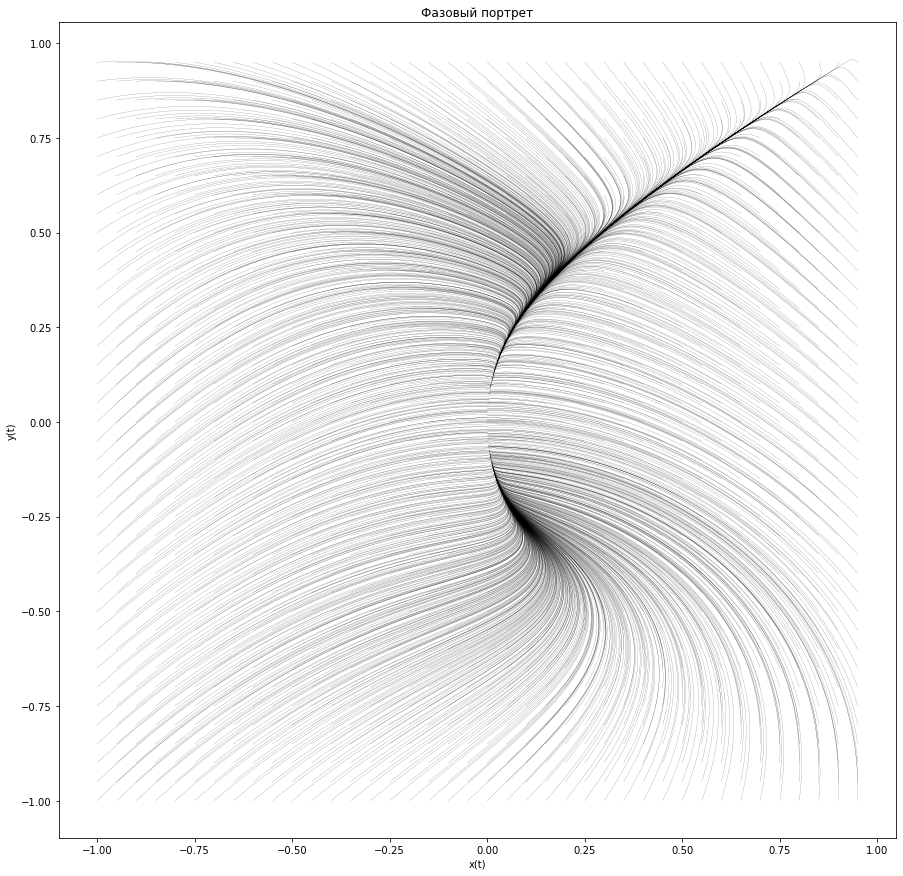

In [5]:
%matplotlib inline
def phase_portrait(s0_min=-1, s0_max=1, s1_min=-1, s1_max=1, s0_step=0.1, s1_step=0.1, T=10, N=101, F=F):
    plt.clf()
    fig = plt.gcf()
    fig.set_size_inches(15, 15)

    t = np.linspace(0, T, num=N)

    for s0 in np.arange(s0_min, s0_max, s0_step):
        for s1 in np.arange(s1_min, s1_max, s1_step):
            v = sol_eq(F, s0, s1, t)
            x, y = v[:, 0], v[:, 1]
            plt.plot(x, y, color='black', linewidth=0.125) # label=f"s0={round(s0, 2)}, s1={round(s1, 2)}"
    
    plt.title("Фазовый портрет")
    plt.xlabel("x(t)")
    plt.ylabel("y(t)")
    plt.show()

# Фазовый портрет 
phase_portrait(s0_step=0.05, s1_step=0.05, N=1001)

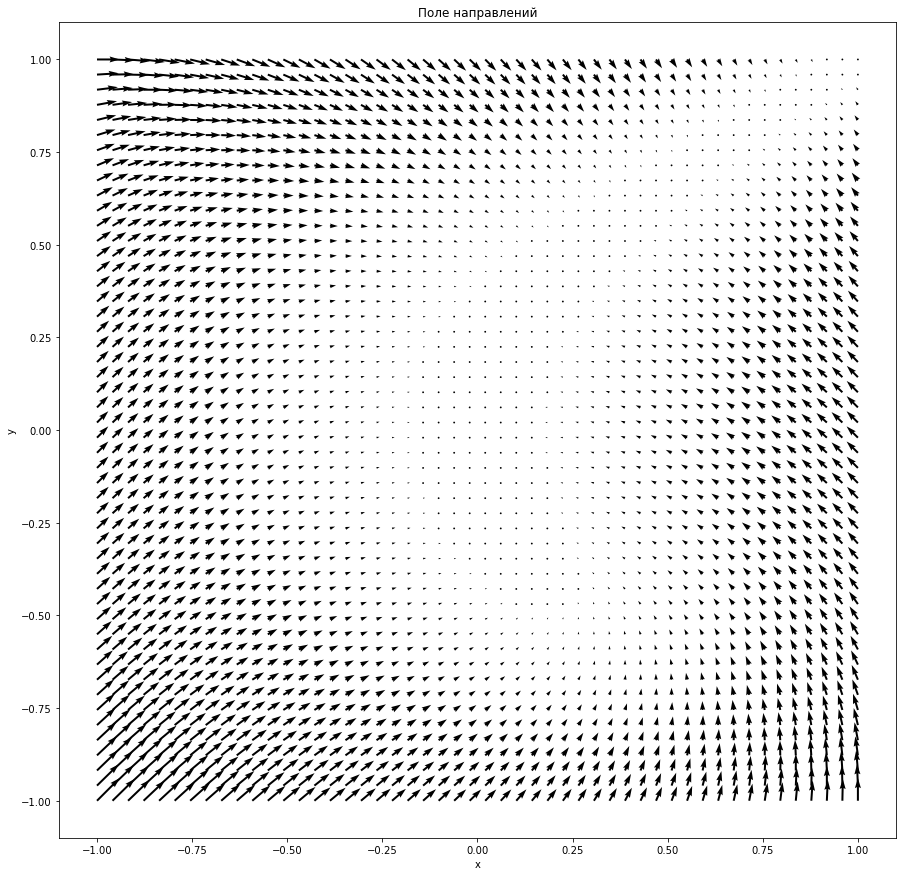

In [6]:
%matplotlib inline
def vector_field(x_min=-1, x_max=1, y_min=-1, y_max=1, N=50):
    plt.clf()
    fig = plt.gcf()
    fig.set_size_inches(15, 15)

    X = np.linspace(x_min, x_max, num=N)
    Y = np.linspace(y_min, y_max, num=N)
    X, Y = np.meshgrid(X, Y)
    
    u = der_x(X, Y)
    v = der_y(X, Y)

    # Векторное поле
    plt.quiver(X, Y, u, v, color='black', linewidth=0.5)

    # Поток
    # color = v
    # plt.streamplot(X, Y, u, v, color=v, linewidth=1.5, density=1., cmap='jet', arrowsize=1)
    
    plt.title("Поле направлений")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

vector_field(x_max=1.0, y_max=1.0)

Далее имеются функции для интерактивного взаимодействия с фазовым портретом и векторным полем.<br/>
<b>НЕ рекомендуется</b> к использованиею на слабой машине.

In [7]:
# Интерактивный фазовый портрет с настройкой шагов, максимального времени T и количества "шагов" времени N
# !!! ВНИМАНИЕ !!!
# Требует большие вычислительные мощности, не советую использовать на относительно слабом компьютере
# 
# def interact_phase_portrait(s0_step=0.05, s1_step=0.05, T=10, N=101):
#     phase_portrait(s0_step=s0_step, s1_step=s1_step, T=T, N=N) 
# 
# %matplotlib widget
# interact(interact_phase_portrait, s0_step=(0.01, 1, 0.01), s1_step=(0.01, 1, 0.01), T=(10, 1000, 10), N=(101, 1001, 100))

In [8]:
# Интерактивное векторное поле с настройкой шагов, максимального времени T и количества "шагов" времени N
# !!! ВНИМАНИЕ !!!
# Требует не очень большие, но средние вычислительные мощности, не советую использовать на очень слабом компьютере
# 
# def interact_vector_field(x_min=-1, x_max=1, y_min=-1, y_max=1, N=50):
#     vector_field(x_min=-1, x_max=1, y_min=-1, y_max=1, N=50) 
# 
# %matplotlib widget
# interact(vector_field, x_min=(-10, 0, 0.1), x_max=(0, 10, 0.1), y_min=(-10, 0, 0.1), y_max=(0, 10, 0.1), N=(10, 100, 10))